In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from src_code.support_function import *

# Import data

In [2]:
data_monthly_all = pd.read_csv('./data/data_all_var.csv').set_index('date') # has gov_bond, has VN CPI
data_monthly = pd.read_csv('./data/data_long_month.csv').set_index('date') # no gov_bond, has VN CPI
data_daily_0 = pd.read_csv('./data/data_long.csv').set_index('date') # no gov_bond, no VN CPI
data_daily_noMacro = pd.read_csv('./data/data_short.csv').set_index('date') # has gov_bond, no VN CPI

In [3]:
# Data shape
print(f"Monthly data all variables: {data_monthly_all.shape}")
print(f"Monthly data without Government Bond: {data_monthly.shape}")
print(f"Daily data without macro variables: {data_daily_noMacro.shape}")
print(f"Daily data without Government Bond and CPI: {data_daily_0.shape}")

Monthly data all variables: (90, 7)
Monthly data without Government Bond: (261, 6)
Daily data without macro variables: (1817, 6)
Daily data without Government Bond and CPI: (5103, 5)


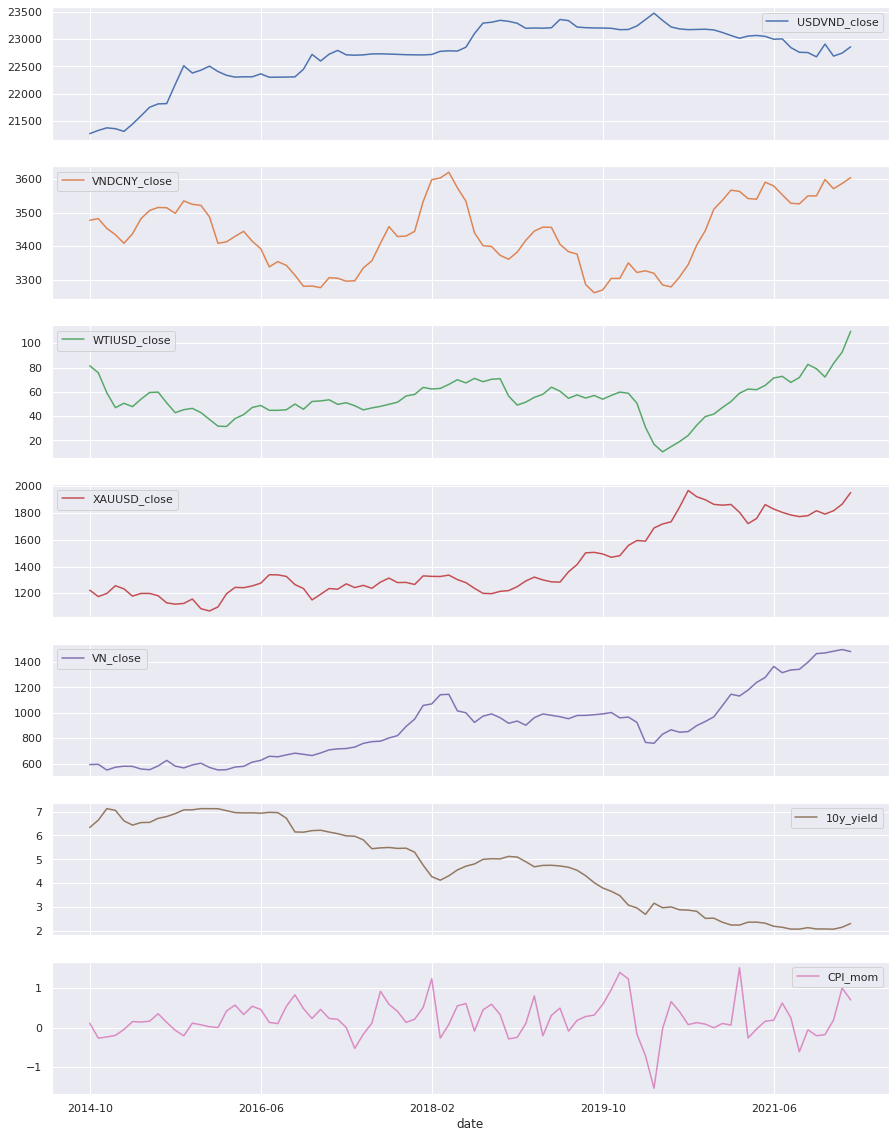

In [4]:
data_monthly_all.plot(kind = 'line', figsize = (15,20), subplots = True)
plt.show();

# Windowed Correlation

In [5]:
list_correlation = list()

In [6]:
data_monthly_all_pctChange = data_monthly_all.copy()
data_monthly_all_pctChange[data_monthly_all_pctChange.columns.difference(['CPI_mom'])] = data_monthly_all_pctChange[data_monthly_all_pctChange.columns.difference(['CPI_mom'])].pct_change()
data_monthly_all_pctChange.index = pd.DatetimeIndex(data_monthly_all_pctChange.index)
data_monthly_all_pctChange.index = data_monthly_all_pctChange.index.to_period("M")
data_monthly_all_pctChange = data_monthly_all_pctChange.dropna()
data_monthly_all_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
date,,,,,,,
2014-11,0.002814,0.001412,-0.071462,-0.039095,0.003369,0.048642,-0.2700
2014-12,0.002195,-0.008316,-0.216584,0.019869,-0.076246,0.072358,-0.2400
2015-01,-0.000739,-0.005393,-0.207837,0.048117,0.040954,-0.010043,-0.2000
2015-02,-0.002293,-0.007435,0.077188,-0.018435,0.014090,-0.062069,-0.0500
2015-03,0.006265,0.008270,-0.054328,-0.044125,-0.002719,-0.026823,0.1500
...,...,...,...,...,...,...,...
2021-11,-0.003429,0.000013,-0.043299,0.020759,0.048652,-0.025019,-0.2078
2021-12,0.010298,0.013628,-0.086465,-0.013909,0.003699,-0.000526,-0.1816
2022-01,-0.009612,-0.007553,0.154829,0.014007,0.009150,-0.003731,0.1916


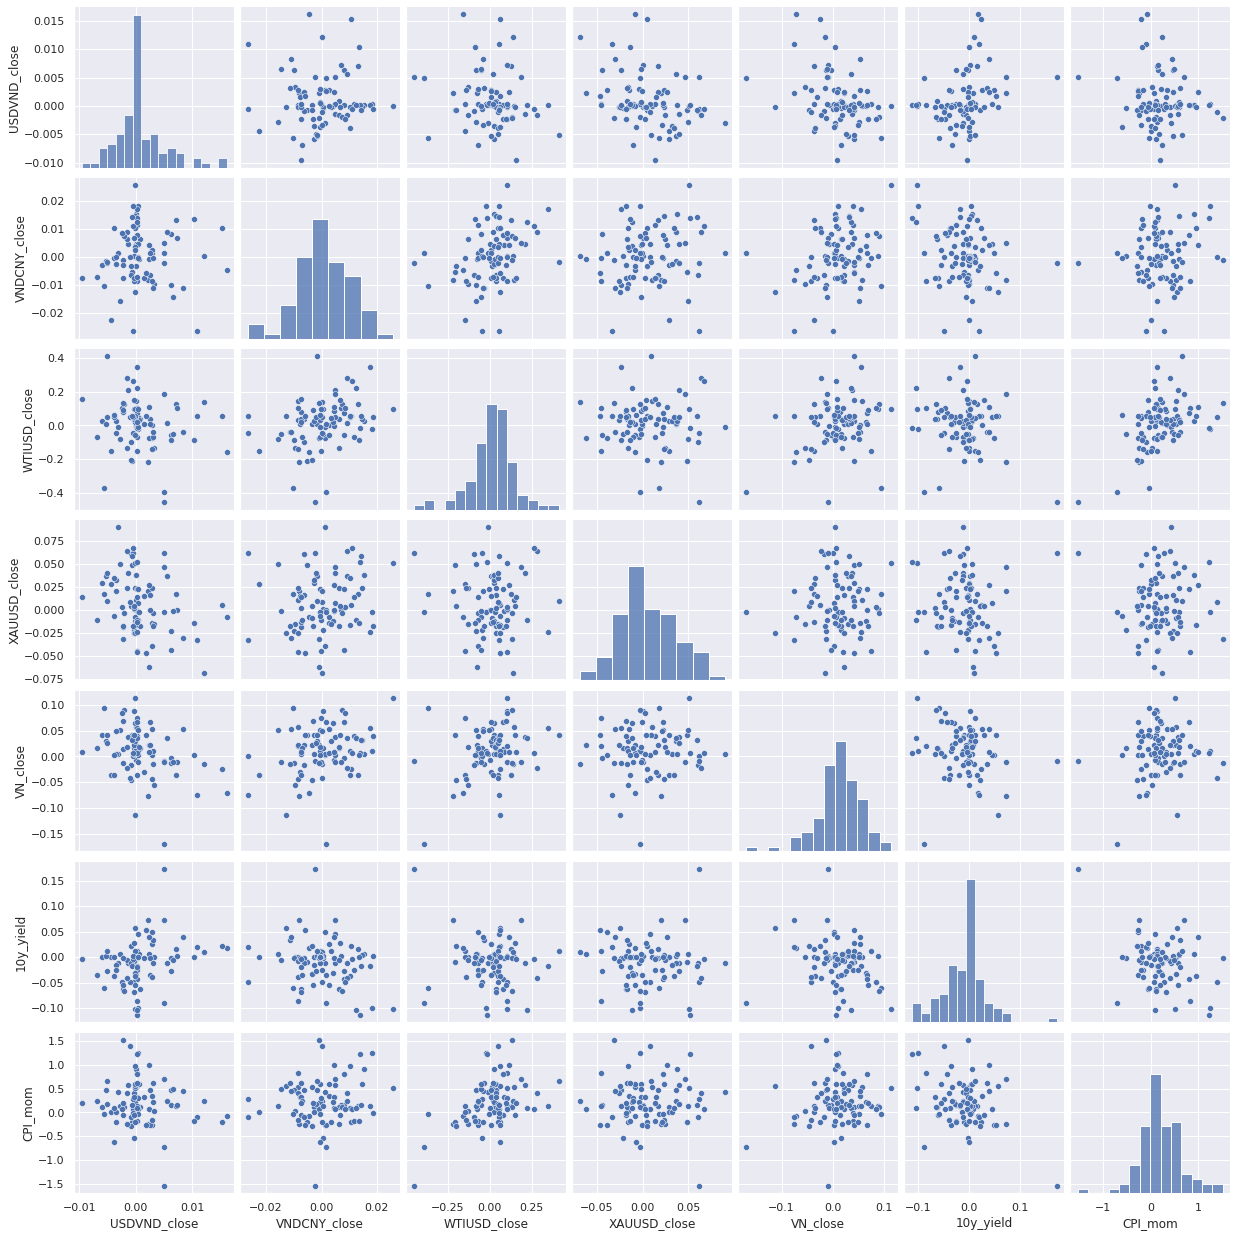

In [7]:
sns.pairplot(data_monthly_all_pctChange);

In [8]:
data_monthly_pctChange = data_monthly.copy()
data_monthly_pctChange[data_monthly_pctChange.columns.difference(['CPI_mom'])] = data_monthly_pctChange[data_monthly_pctChange.columns.difference(['CPI_mom'])].pct_change()
data_monthly_pctChange.index = pd.DatetimeIndex(data_monthly_pctChange.index)
data_monthly_pctChange.index = data_monthly_pctChange.index.to_period("M")
data_monthly_pctChange = data_monthly_pctChange.dropna()
data_monthly_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,CPI_mom
date,,,,,,
2000-08,0.000914,0.000865,0.141199,-0.009433,0.108276,0.1000
2000-09,0.004032,0.004157,0.084611,-0.003616,0.037389,-0.2000
2000-10,0.018334,0.018344,-0.032018,-0.013589,0.117583,0.1000
2000-11,0.003261,0.003406,0.045222,-0.015213,0.205458,0.9000
2000-12,0.004539,0.004555,-0.166469,0.023481,0.198826,0.1000
...,...,...,...,...,...,...
2021-11,-0.003429,0.000013,-0.043299,0.020759,0.048652,-0.2078
2021-12,0.010440,0.013703,-0.087233,-0.014363,0.003569,-0.1816
2022-01,-0.009750,-0.007626,0.155800,0.014474,0.009280,0.1916


<AxesSubplot:xlabel='date'>

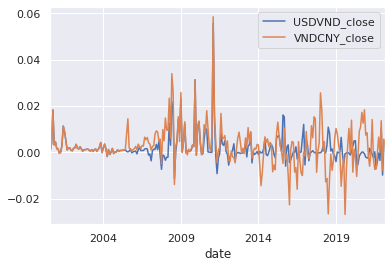

In [9]:
data_monthly_pctChange[['USDVND_close','VNDCNY_close']].plot()

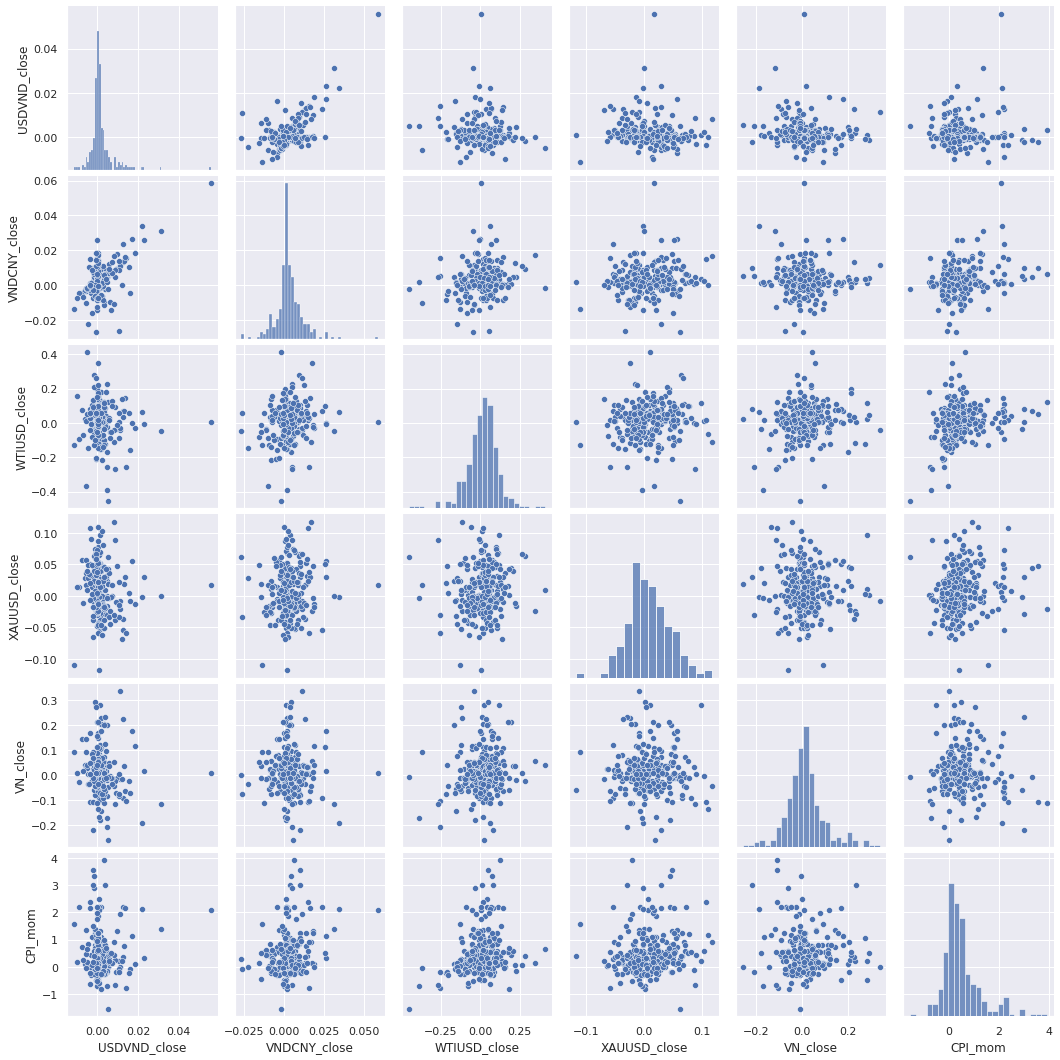

In [10]:
sns.pairplot(data_monthly_pctChange);

### commodity vs fx rate

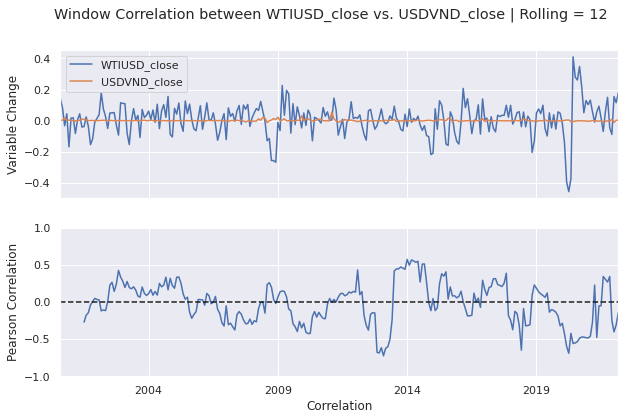

In [11]:
wti_usdvnd_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "USDVND_close", name_plot = None, r_window_size = 12)

In [12]:
list_correlation.append(wti_usdvnd_corr)

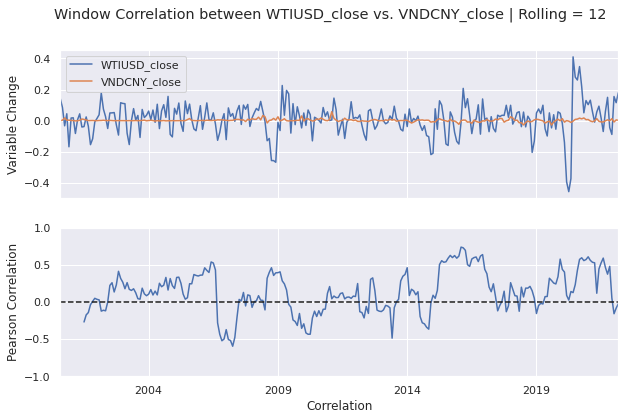

In [13]:
wti_vndcny_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "VNDCNY_close", name_plot = None, r_window_size = 12)

In [14]:
list_correlation.append(wti_vndcny_corr)

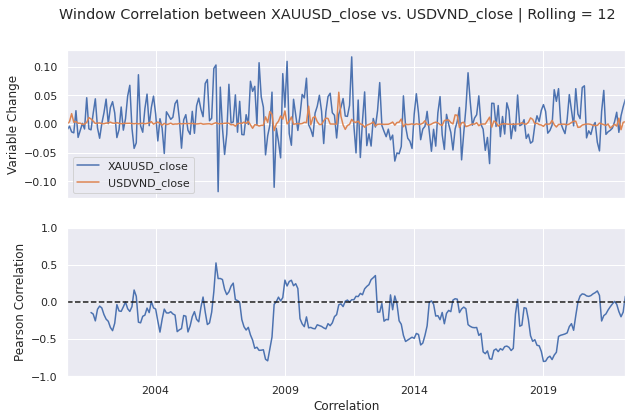

In [15]:
xau_usdvnd_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "USDVND_close", name_plot = None, r_window_size = 12)

In [16]:
list_correlation.append(xau_usdvnd_corr)

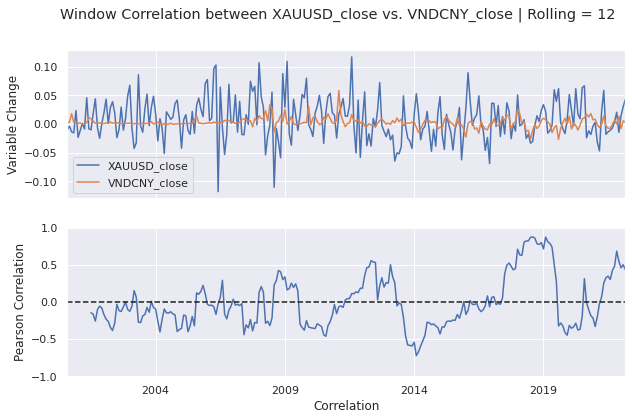

In [17]:
xau_vndcny_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "VNDCNY_close", name_plot = None, r_window_size = 12)

In [18]:
xau_vndcny_corr.index

PeriodIndex(['2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01',
             '2001-02', '2001-03', '2001-04', '2001-05',
             ...
             '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
             '2021-12', '2022-01', '2022-02', '2022-03'],
            dtype='period[M]', name='date', length=260)

In [19]:
list_correlation.append(xau_vndcny_corr)

### commodity vs vnindex

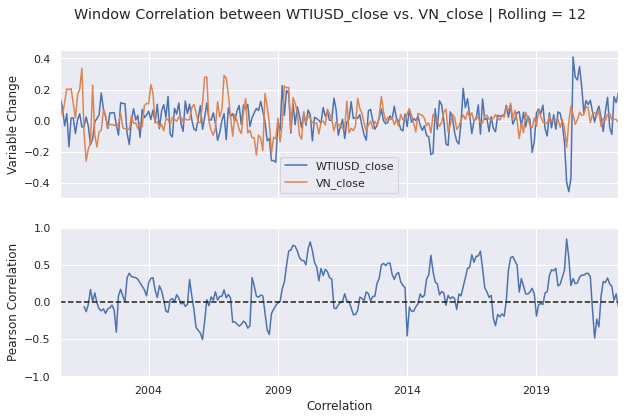

In [20]:
wti_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "VN_close", name_plot = None, r_window_size = 12)

In [21]:
list_correlation.append(wti_vni_corr)

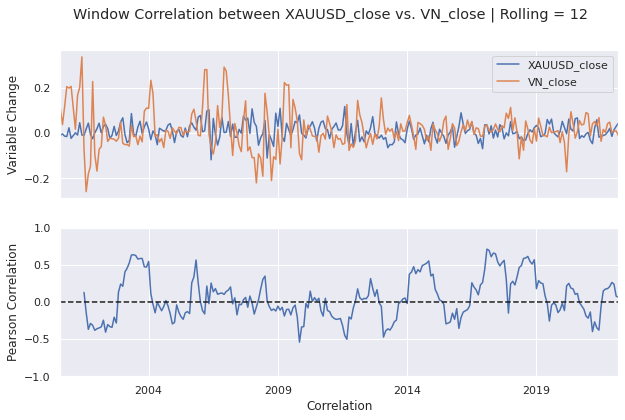

In [22]:
xau_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "VN_close", name_plot = None, r_window_size = 12)

In [23]:
list_correlation.append(xau_vni_corr)

## fx vs vnindex

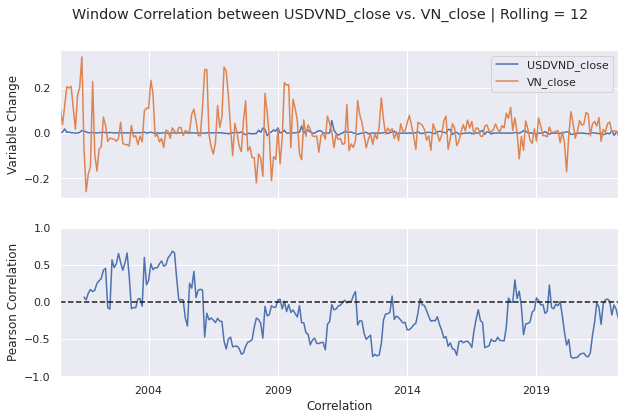

In [24]:
usdnvd_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "USDVND_close", "VN_close", name_plot = None, r_window_size = 12)

In [25]:
usdnvd_vni_corr

,USDVND_close_vs_VN_close
date,
2000-08,NaN
2000-09,NaN
2000-10,NaN
2000-11,NaN
2000-12,NaN
...,...
2021-11,0.011895
2021-12,-0.172915
2022-01,-0.036119


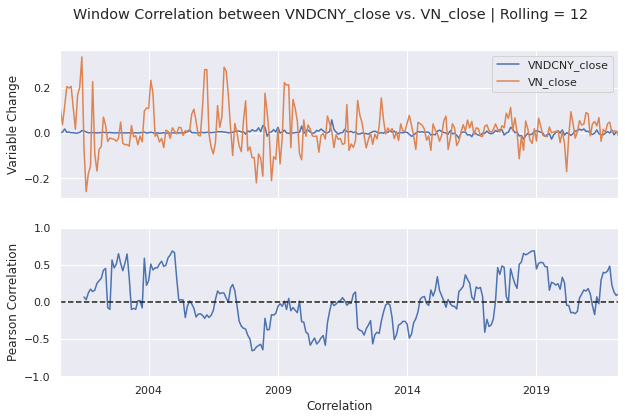

In [26]:
vndcny_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "VNDCNY_close", "VN_close", name_plot = None, r_window_size = 12)

In [27]:
vndcny_vni_corr

,VNDCNY_close_vs_VN_close
date,
2000-08,NaN
2000-09,NaN
2000-10,NaN
2000-11,NaN
2000-12,NaN
...,...
2021-11,0.487043
2021-12,0.230620
2022-01,0.135941


In [28]:
list_correlation.append(usdnvd_vni_corr)
list_correlation.append(vndcny_vni_corr)

## with tpcp

### commodity vs Gov bond

In [29]:
data_daily_noMacro_pctChange = data_daily_noMacro.pct_change().dropna()
data_daily_noMacro_pctChange.index = pd.DatetimeIndex(data_daily_noMacro_pctChange.index)
data_daily_noMacro_pctChange = data_daily_noMacro_pctChange.resample('M').sum()
data_daily_noMacro_pctChange.index = data_daily_noMacro_pctChange.index.to_period("M")
data_daily_noMacro_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield
date,,,,,,
2014-10,0.001177,0.002943,-0.024495,-0.059219,0.020244,0.015958
2014-11,0.003414,-0.001553,-0.191579,-0.004161,-0.058090,0.085957
2014-12,0.001646,-0.008509,-0.199505,0.016218,-0.035315,0.037659
2015-01,-0.003287,-0.010307,-0.104931,0.082216,0.055173,-0.071571
2015-02,0.001562,-0.001550,0.044106,-0.055538,0.029012,-0.030176
...,...,...,...,...,...,...
2021-12,0.006134,0.007995,0.118204,0.030647,0.014648,0.004967
2022-01,-0.007897,-0.009172,0.151976,-0.020125,-0.011238,-0.004647
2022-02,0.007050,0.015292,0.106017,0.063792,0.008032,0.069684


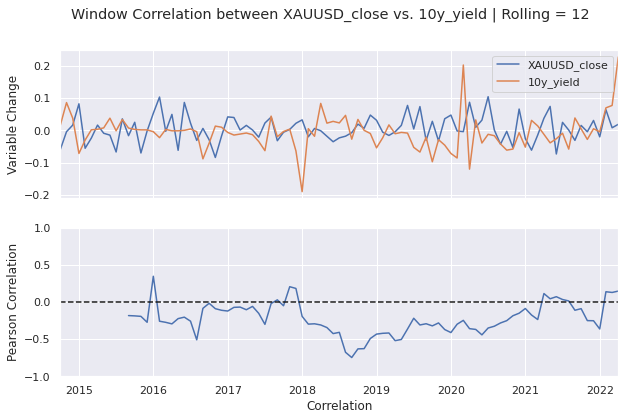

In [30]:
xau_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "XAUUSD_close", "10y_yield", name_plot = None, r_window_size = 12)

In [31]:
list_correlation.append(xau_vnbond_corr)

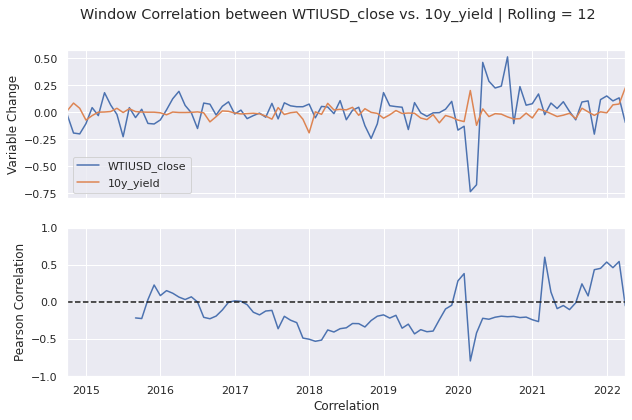

In [32]:
wti_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "WTIUSD_close", "10y_yield", name_plot = None, r_window_size = 12)

In [33]:
list_correlation.append(wti_vnbond_corr)

### fx vs gov bond

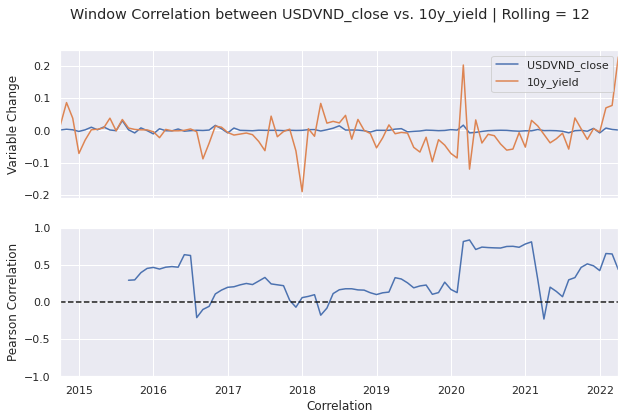

In [34]:
usdvnd_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "USDVND_close", "10y_yield", name_plot = None, r_window_size = 12)

In [35]:
list_correlation.append(usdvnd_vnbond_corr)

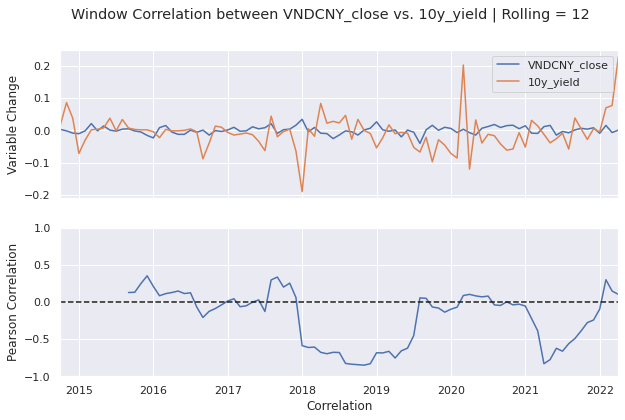

In [36]:
vndcny_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "VNDCNY_close", "10y_yield", name_plot = None, r_window_size = 12)

In [37]:
list_correlation.append(vndcny_vnbond_corr)

### vni vs gov bond

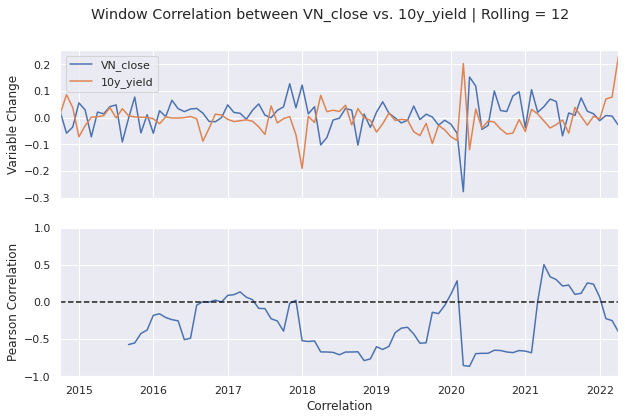

In [38]:
vni_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "VN_close", "10y_yield", name_plot = None, r_window_size = 12)

In [39]:
list_correlation.append(vni_vnbond_corr)

## with cpi

### commodity vs cpi

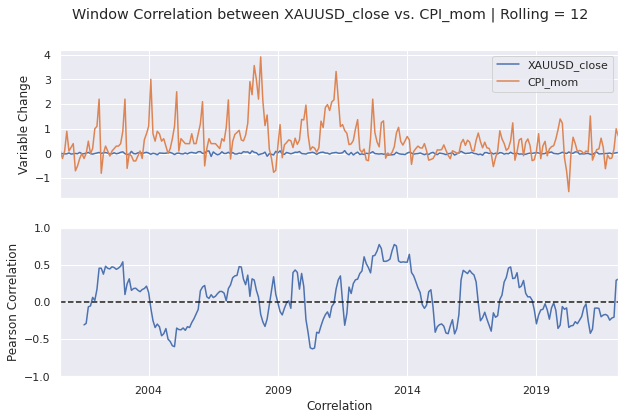

In [40]:
xau_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [41]:
list_correlation.append(xau_cpi_corr)

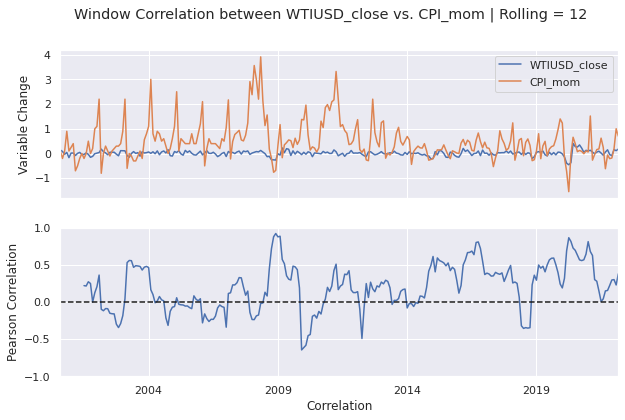

In [42]:
wti_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [43]:
list_correlation.append(wti_cpi_corr)

### fx vs cpi

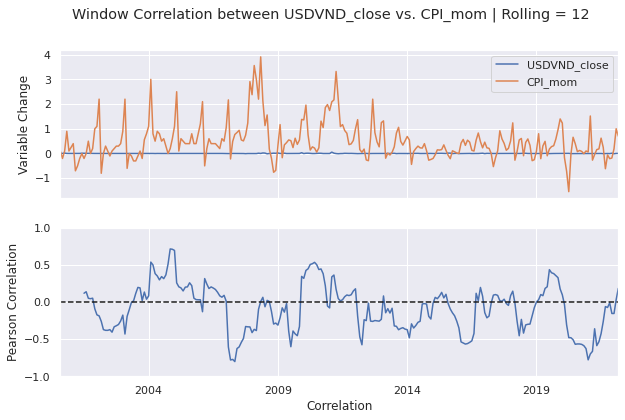

In [44]:
usdvnd_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "USDVND_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [45]:
list_correlation.append(usdvnd_cpi_corr)

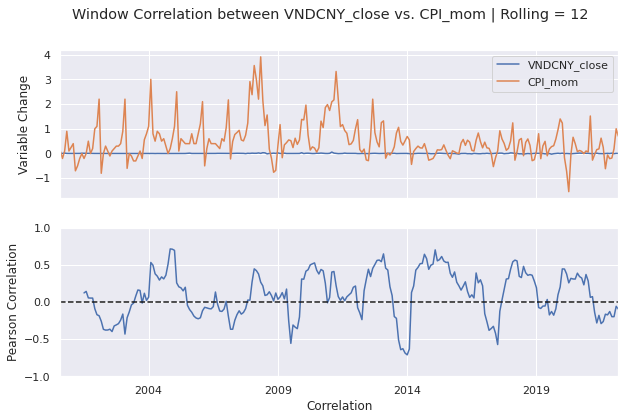

In [46]:
vndcny_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "VNDCNY_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [47]:
list_correlation.append(vndcny_cpi_corr)

### vnindex vs cpi

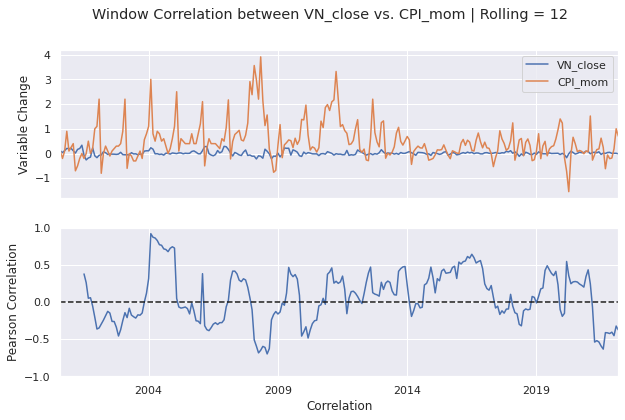

In [48]:
vni_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "VN_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [49]:
list_correlation.append(vni_cpi_corr)

### gov bond vs cpi

In [50]:
data_monthly_bond_macro = data_monthly_all[['10y_yield', 'CPI_mom']]
data_monthly_bond_macro['10y_yield'] = data_monthly_bond_macro['10y_yield'].pct_change()
data_monthly_bond_macro.index = pd.DatetimeIndex(data_monthly_bond_macro.index)
data_monthly_bond_macro.index = data_monthly_bond_macro.index.to_period("M")
data_monthly_bond_macro = data_monthly_bond_macro.dropna()

/tmp/ipykernel_1227/1782021853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monthly_bond_macro['10y_yield'] = data_monthly_bond_macro['10y_yield'].pct_change()


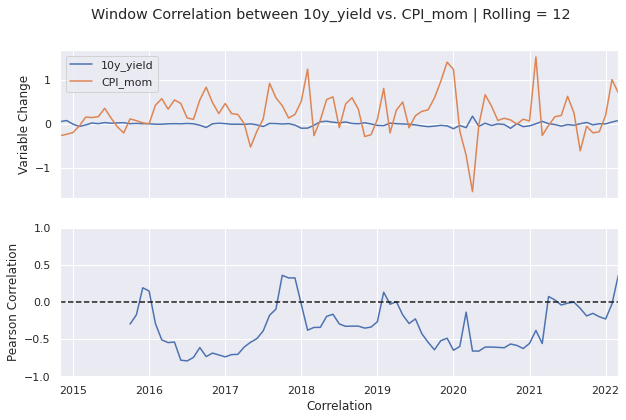

In [51]:
vnbond_cpi_corr = plot_windowCorrelation(data_monthly_bond_macro, "10y_yield", "CPI_mom", name_plot = None, r_window_size = 12)

In [52]:
list_correlation.append(vnbond_cpi_corr)

In [53]:
len(list_correlation)

19

In [54]:
from functools import reduce
corr_frame = reduce(lambda df1, df2: pd.merge(df1,df2, left_index=True, right_index=True, how = 'outer'), list_correlation)

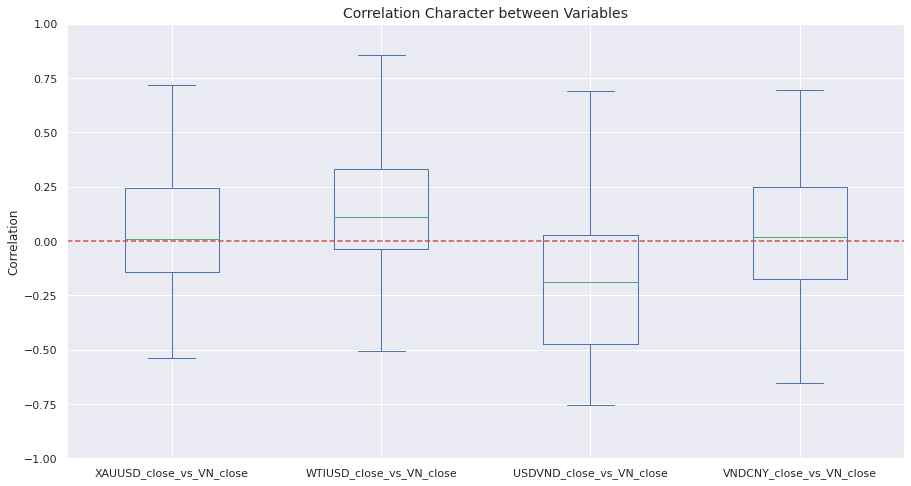

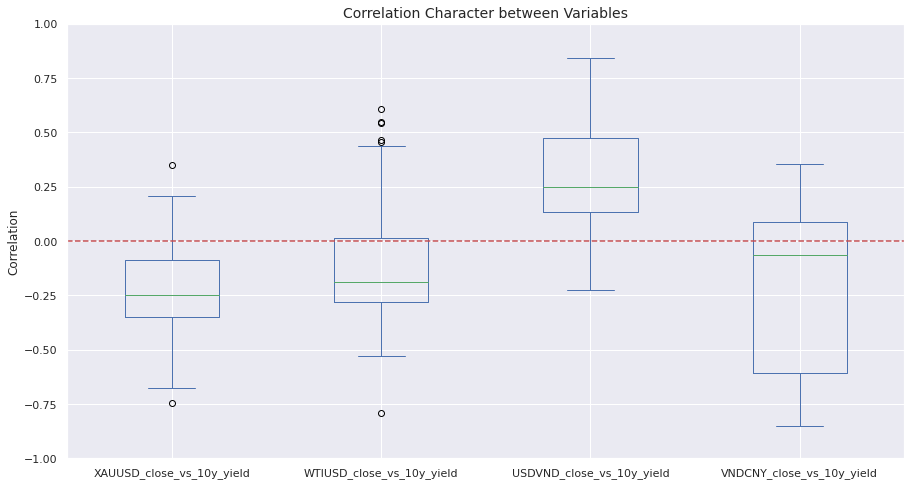

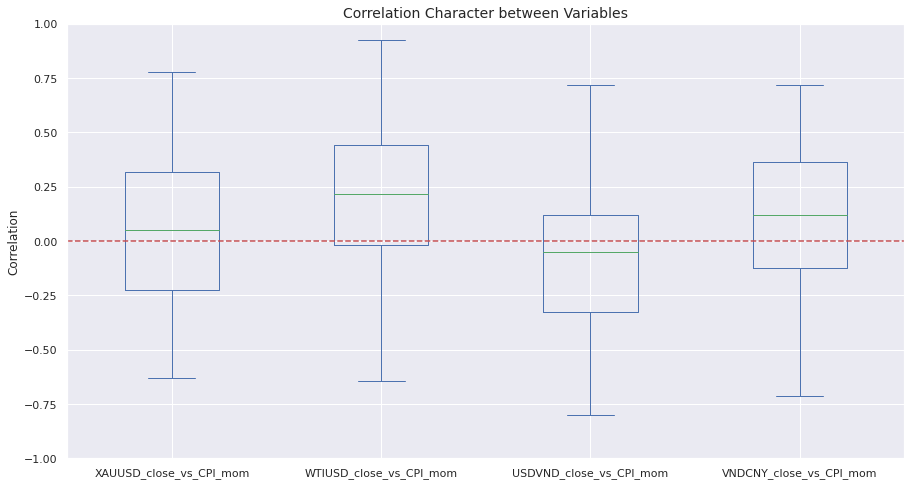

In [55]:
box_plot_corr(corr_frame[['XAUUSD_close_vs_VN_close', 'WTIUSD_close_vs_VN_close',
                          'USDVND_close_vs_VN_close', 'VNDCNY_close_vs_VN_close',
                          'XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield',
                          'USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield',
                          'XAUUSD_close_vs_CPI_mom', 'WTIUSD_close_vs_CPI_mom',
                          'USDVND_close_vs_CPI_mom', 'VNDCNY_close_vs_CPI_mom'
                          ]],n_box = 4)

# plot Corr only

In [56]:
corr_frame.columns

Index(['WTIUSD_close_vs_USDVND_close', 'WTIUSD_close_vs_VNDCNY_close',
       'XAUUSD_close_vs_USDVND_close', 'XAUUSD_close_vs_VNDCNY_close',
       'WTIUSD_close_vs_VN_close', 'XAUUSD_close_vs_VN_close',
       'USDVND_close_vs_VN_close', 'VNDCNY_close_vs_VN_close',
       'XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield',
       'USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield',
       'VN_close_vs_10y_yield', 'XAUUSD_close_vs_CPI_mom',
       'WTIUSD_close_vs_CPI_mom', 'USDVND_close_vs_CPI_mom',
       'VNDCNY_close_vs_CPI_mom', 'VN_close_vs_CPI_mom',
       '10y_yield_vs_CPI_mom'],
      dtype='object')

<AxesSubplot:xlabel='date'>

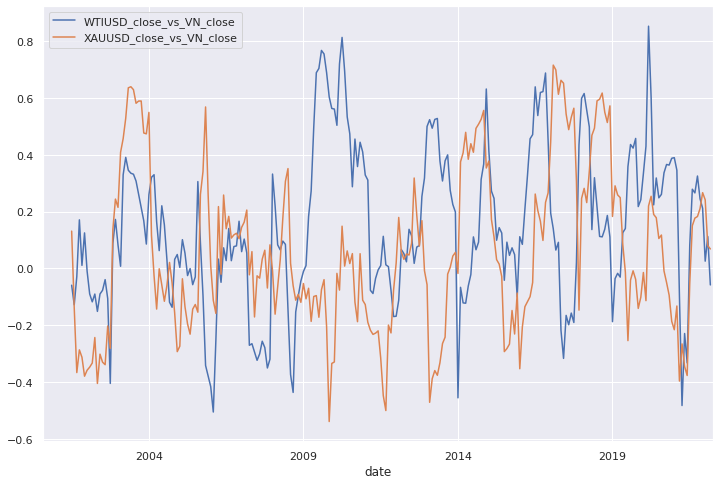

In [57]:
corr_frame[['WTIUSD_close_vs_VN_close', 'XAUUSD_close_vs_VN_close']].plot(figsize = (12,8))

In [58]:
# def plotOnEvent(frame, columns, is_lack = False):
#     """plot graph on defined event

#     Args:
#         frame (DataFrame): frame to plot
#         columns (list): list of column to plot
#     """
#     from matplotlib.dates import date2num
#     from datetime import datetime
#     test = frame.copy()
#     test.index = test.index.to_timestamp()
#     test = test[columns]
#     test = test.dropna()
#     fig, ax = plt.subplots(figsize=(12,8))
#     ax.plot(test.index,test[columns].values)
#     # test.plot(figsize = (12,8), ax = ax)
#     if is_lack == False:
#         ax.axvspan(date2num(datetime(2008,1,12)), date2num(datetime(2010,6,1)), # datetime(2007,1,12)), date2num(datetime(2009,6,1)
#                 label="2009 Recession", color="gray", alpha=0.3)
#         ax.axvspan(date2num(datetime(2011,5,1)), date2num(datetime(2012,7,1)),  # datetime(2010,5,1)), date2num(datetime(2011,7,1)
#                 label="Sovereign Debt in Europe", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2016,1,1)), date2num(datetime(2016,12,31)), # datetime(2015,1,1)), date2num(datetime(2015,12,31)
#             label="China capital ouflow", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2017,10,1)), date2num(datetime(2017,11,3)), # datetime(2016,10,1)), date2num(datetime(2016,11,3)
#             label="OPEC cut oil supply", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2018,1,1)), date2num(datetime(2019,1,1)), # datetime(2017,1,1)), date2num(datetime(2018,1,1)
#             label="DXY drop", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2019,7,6)), date2num(datetime(2021,1,13)), # datetime(2018,7,6)), date2num(datetime(2020,1,13)
#             label="Trade War", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2020,12,31)), date2num(datetime(2021,12,31)), # datetime(2019,12,31)), date2num(datetime(2021,12,31)
#             label="Covid-19", color="gray", alpha=0.3)
#     ax.axhline(color='r',linestyle='--',label='Center')
#     ax.legend(columns)
#     plt.show();
#     return

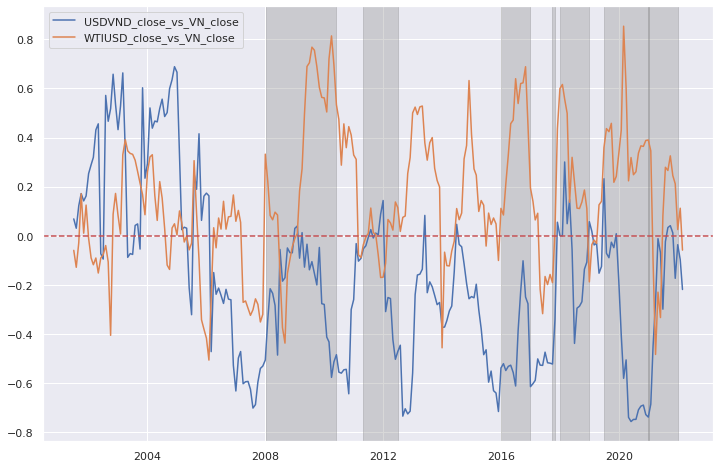

In [59]:
plotOnEvent(corr_frame, ['USDVND_close_vs_VN_close', 'WTIUSD_close_vs_VN_close'])

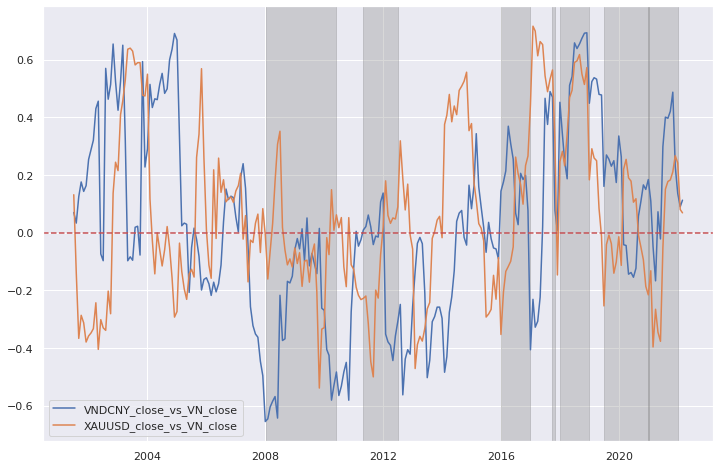

In [60]:
plotOnEvent(corr_frame, ['VNDCNY_close_vs_VN_close', 'XAUUSD_close_vs_VN_close'])

<AxesSubplot:xlabel='date'>

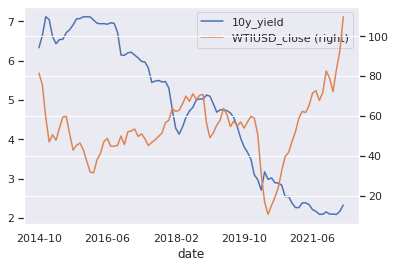

In [61]:
data_monthly_all[['10y_yield', 'WTIUSD_close']].plot(secondary_y = 'WTIUSD_close')

<AxesSubplot:xlabel='date'>

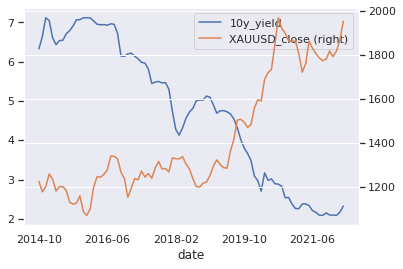

In [62]:
data_monthly_all[['10y_yield', 'XAUUSD_close']].plot(secondary_y = 'XAUUSD_close')

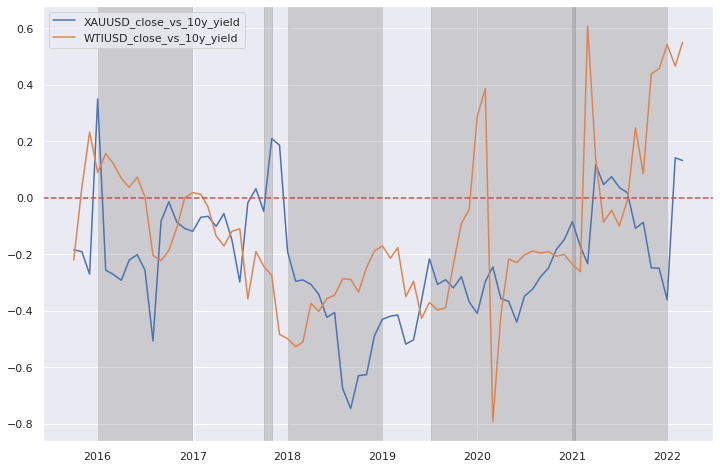

In [63]:
plotOnEvent(corr_frame.dropna(), ['XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield'], is_lack=True)

<AxesSubplot:xlabel='date'>

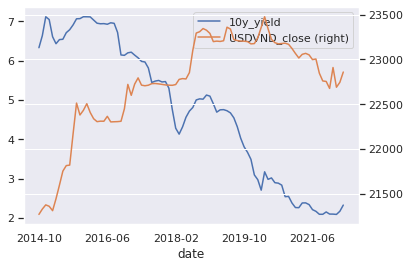

In [64]:
data_monthly_all[['10y_yield', 'USDVND_close']].plot(secondary_y = 'USDVND_close')

<AxesSubplot:xlabel='date'>

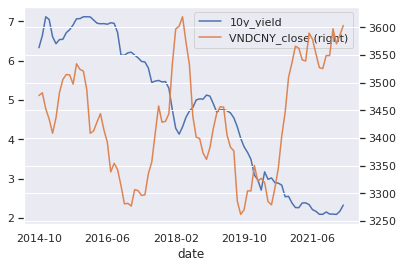

In [65]:
data_monthly_all[['10y_yield', 'VNDCNY_close']].plot(secondary_y = 'VNDCNY_close')

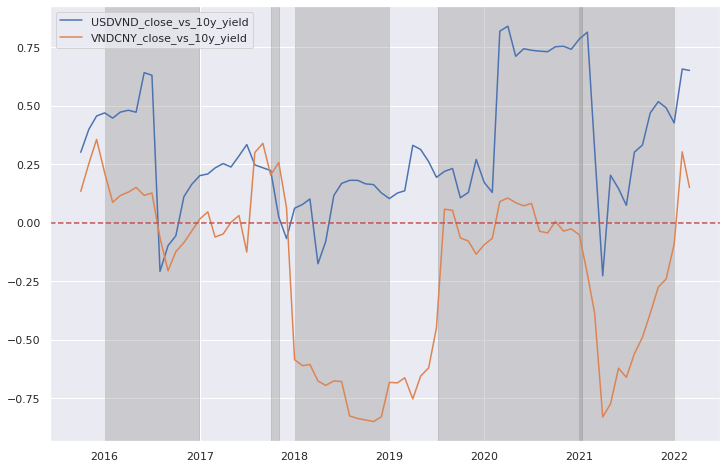

In [66]:
# corr_frame[['USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield']].dropna().plot(figsize = (12,8))
plotOnEvent(corr_frame.dropna(), ['USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield'], is_lack=True)

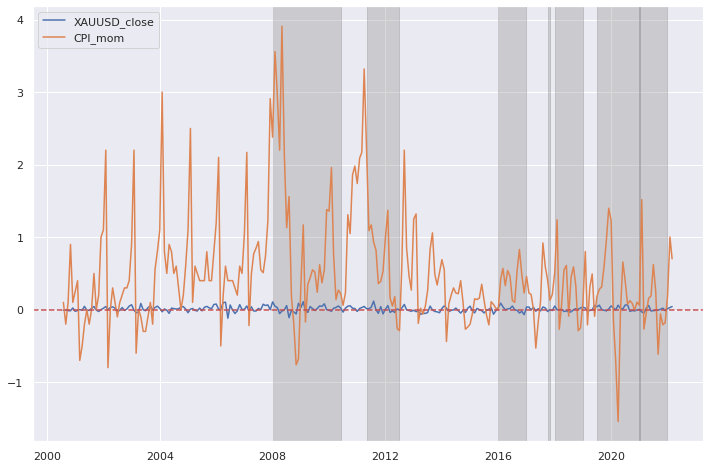

In [ ]:
# data_monthly_pctChange[ ['XAUUSD_close','CPI_mom']].plot(secondary_y = 'CPI_mom', figsize = (12,8))
plotOnEvent(data_monthly_pctChange, ['XAUUSD_close','CPI_mom'])

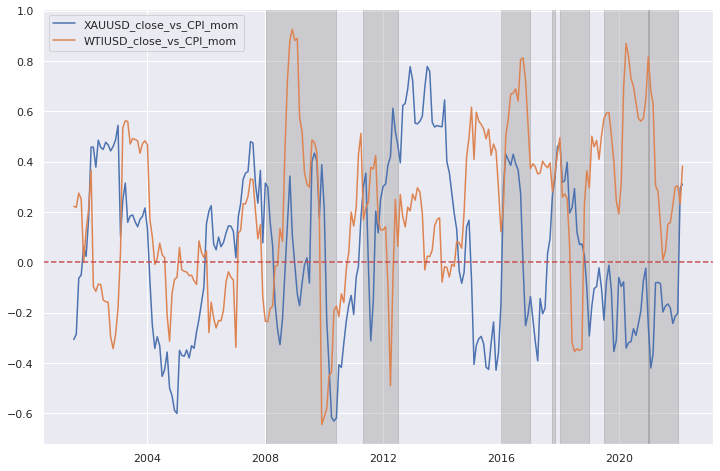

In [68]:
# corr_frame[['XAUUSD_close_vs_CPI_mom','WTIUSD_close_vs_CPI_mom']].dropna().plot()
plotOnEvent(corr_frame, ['XAUUSD_close_vs_CPI_mom','WTIUSD_close_vs_CPI_mom'], is_lack=False)

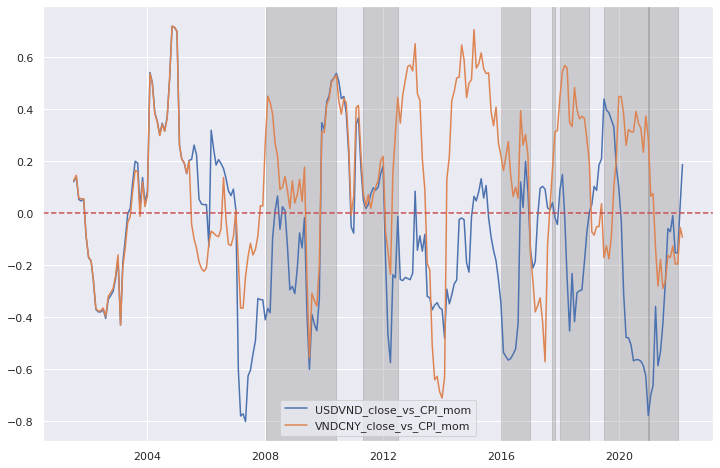

In [69]:
plotOnEvent(corr_frame, ['USDVND_close_vs_CPI_mom','VNDCNY_close_vs_CPI_mom'], is_lack=False)

## Try Anomaly Detection

In [ ]:
# event = [
#     [2007, 2010], # GFC
#     [2010, 2011], # Sovereign debt in Europe
#     [2015, 2018], # 3 events 
#                     ## 2015 Fed increased rate, capital outflow from China, China Yuan devaluated
#                     ## 2015 US Shale oil increased 
#                     ## 2016 OPEC Cut oil
#                     ## 2016 SBV Centered exchange rate 
#                     ## 2017 5 bil USD inflow due to Sabeco deal + DXY decreased due to Trump policy  
#     [2018, 2019], # Trade war > USDVND and USDCNY increased
#     [2020, 2022]  # 2019-2021 Covid 19 Pandemic
#                   # 2020 Covid-19 reduce oil demand
#                   # 2022 Russia vs Ukraine
# ]

In [ ]:
# cluster_result = list()
# for years in event:
#     print(years)
#     if years[0] < 2014:
#         data_cache = data_monthly_pctChange.loc[str(years[0]):str(years[1])].corr()
#     elif years[0] >= 2014:
#         data_cache = data_monthly_all_pctChange.loc[str(years[0]):str(years[1])].corr()
#     _, cluster_frame = k_cluster(data_cache)
#     print(data_cache)
    
#     cluster_result.append(cluster_frame)

In [70]:
def anomaly_labeling(X, y = None, max_sample = 12, random_state = 42, is_plot = False, is_serialize = False):
    """Basic Anomaly labeling function

    Args:
        X (Series, DataFrame, ndArray): Exogs table or array
        y (Series, optional): Endog variable in pandas Series format. Defaults to None.
        max_sample (int, optional): Number of sample to identify the abnormal. Defaults to 12.
        random_state (int, optional): random seed. Defaults to 42.
        is_plot (bool, optional): whether to plot the graph. Defaults to False.

    Returns:
        sklearn model object, array, array, dataframe: 
    """
    from sklearn.ensemble import IsolationForest

    # check shape X
    try:
        X.shape[1]
    except IndexError as e:
        print(e)
        X = X.reshape(-1,1) # X array contain only 1 feature

    model = IsolationForest(max_samples = max_sample, random_state=random_state)
    labels = model.fit_predict(X)
    labels_score = model.score_samples(X)

    data_test = None
    if is_plot == True:
        data_test = y.copy().to_frame()
        y_name = y._name
        data_test['labels'] = labels
        data_test['labels_score'] = labels_score

        # plot the score
        data_test['labels_score'].plot()
        plt.title('Anomaly Scoring based on given Exog')
        plt.show()

        print('Enter the threshold of anomaly (The lower, the more abnormal)')
        threshold_anomaly = float(input())

        data_test, anomaly_res = _relabel_(data_test, threshold_anomaly=threshold_anomaly)

        import plotly.express as px
        import plotly.graph_objects as go
        # plot value on y-axis and date on x-axis
        if is_serialize == True:
            fig = px.line(data_test, x=data_test.index.to_timestamp(), y=y_name, title='UNSUPERVISED ANOMALY DETECTION')
            # create list of outlier_dates
            outlier_dates = data_test[data_test['anomaly'] == -1].index.to_timestamp()
        else:
            fig = px.line(data_test, x=data_test.index, y=y_name, title='UNSUPERVISED ANOMALY DETECTION')
            # create list of outlier_dates
            outlier_dates = data_test[data_test['anomaly'] == -1].index

        # obtain y value of anomalies to plot
        y_values = [data_test.loc[i][y_name] for i in outlier_dates]
        fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                        name = 'Anomaly', 
                        marker=dict(color='red',size=10)))
    
        fig.show()

        return model, anomaly_res, labels_score, data_test
    else:
        return model, labels_score
    
def _relabel_(data_test, threshold_anomaly):
    """Support  for the anomaly_labeling function

    Args:
        data_test (dataframe): 
        threshold_anomaly (float): 

    Returns:
        dataframe, array: 
    """
    data_test['score_binary'] = np.where(data_test['labels_score'] < threshold_anomaly, -1, 1)
    anomaly_res = list()
    # filter according to threshold
    for idx, row in data_test.iterrows():
        if row['labels'] == row['score_binary']:
            if row['labels'] == 1:
                anomaly_res.append(1)
            else:
                anomaly_res.append(-1)
        elif row['labels'] != row['score_binary']:
            anomaly_res.append(int(row['score_binary']))
                            
    data_test['anomaly'] = anomaly_res

    return data_test, anomaly_res

In [ ]:
anomaly_labeling